In [12]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read



from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
# from plot_trials_info import *

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

# from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
# from plot_days_info import *

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\mice\\cohort3"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/mice/cohort3"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["R511", "R512", "R513"]

# DATES
date_min, date_max = dju.return_date_window(latest_date=None, n_days_back=20)
few_days_ago = (datetime.today() - timedelta(days=4)).strftime("%Y-%m-%d")

In [23]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(
    animal_ids=ANIMAL_IDS, date_min=datetime.today().strftime("%Y-%m-%d")
)

fetched 1 sessions for R511 between 2023-07-25 and 2023-07-25
fetched 1 sessions for R512 between 2023-07-25 and 2023-07-25
fetched 1 sessions for R513 between 2023-07-25 and 2023-07-25


In [24]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=True
)

making R511_2023-07-25_day_summary
making R512_2023-07-25_day_summary
making R513_2023-07-25_day_summary


In [16]:
date_max_dt = trials_df["date"].max()
trials_df.query("date == @date_max_dt").groupby("animal_id").give_type_imp.unique()

animal_id
R511    ['light', 'water_and_light']
Categories (2, ob...
R512    ['light', 'water_and_light']
Categories (2, ob...
R513    ['water_and_light', 'light']
Categories (2, ob...
Name: give_type_imp, dtype: object

In [17]:
trials_df.query("date == @date_max_dt").groupby(
    "animal_id"
).water_delivered.sum() / 1000

animal_id
R511    0.7658
R512    0.9636
R513    1.0566
Name: water_delivered, dtype: float64

In [18]:
trials_df.query("date == @date_max_dt").groupby("animal_id").stage.max()

animal_id
R511    3.0
R512    4.0
R513    3.0
Name: stage, dtype: float64

In [ ]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [26]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS, date_min=date_min, date_max=date_max
# )

f_name = "R51s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)

days_df = lazy_load_days_summary_df(
    date_min="2023-06-27",
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

Loaded pre-saved df with entries between 2023-06-27 and 2023-07-25.


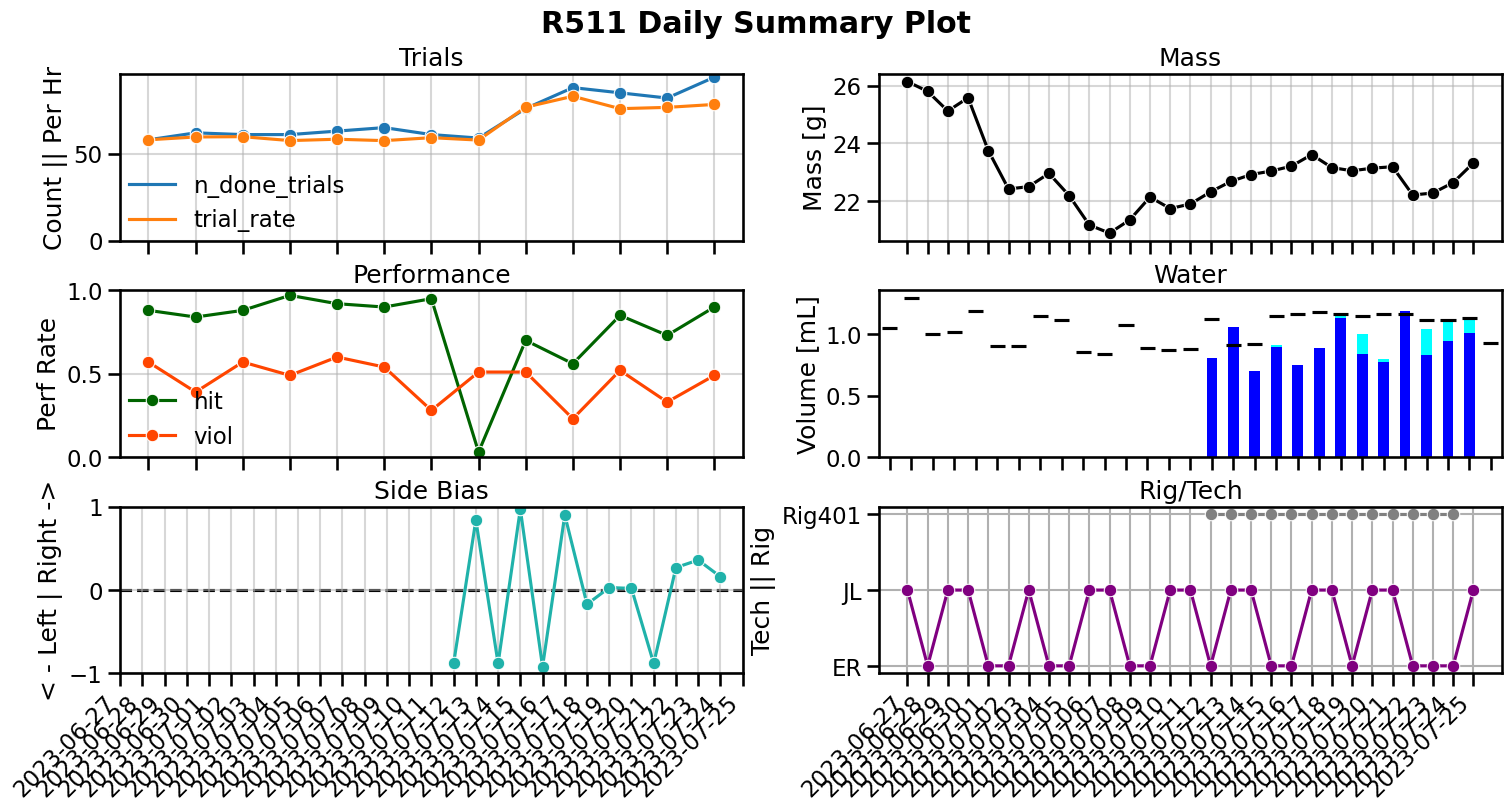

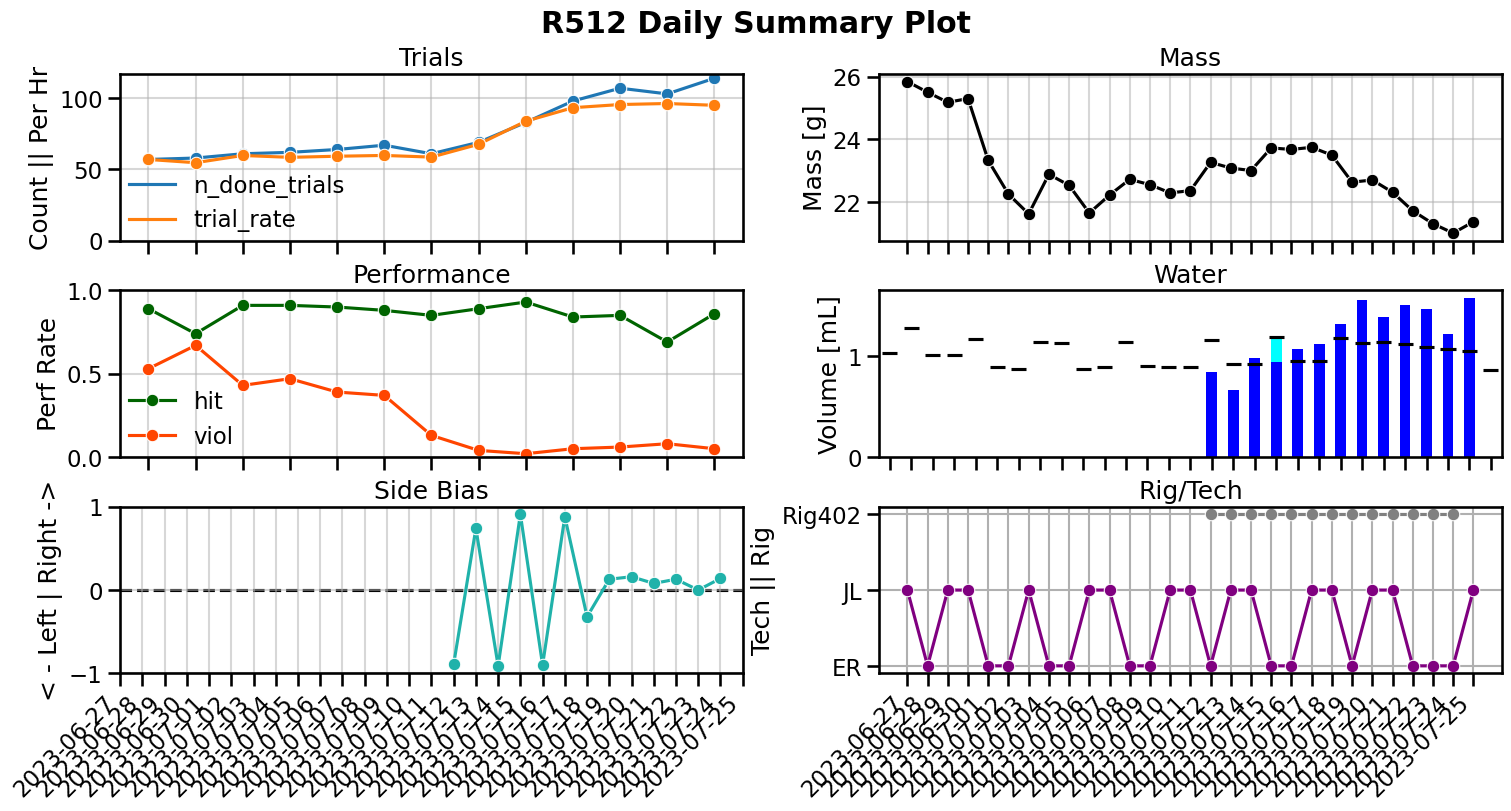

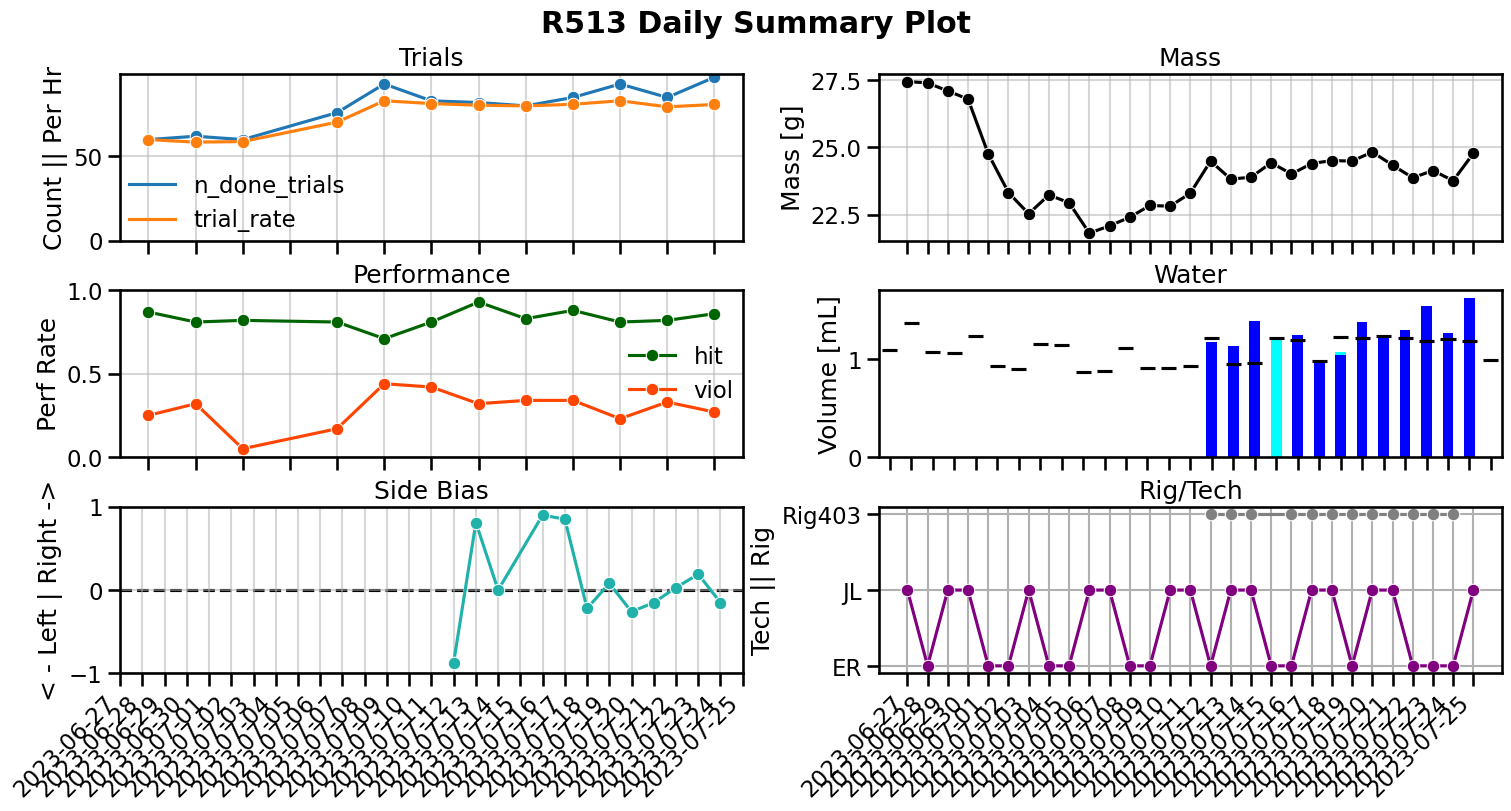

In [27]:
for animal_id, sub_df in days_df.groupby("animal_id"):
    multiplot_multi_day_summary(animal_id, sub_df)